In [1]:
import sys
sys.path.append("./src/keypoints_detection")



from src.image_transformations.coordinate_transforms import *
from src.bounding_box import BBoxModel
from src.keypoints_detection.keypoint_model import KPModel

import torch
from PIL import Image
import cv2
from src.keypoints_detection.hourglass import hg
from scipy.spatial.transform import Rotation
import os
import random
import time
import matplotlib.pyplot as plt

print(2)


2


In [2]:
img_dir = "./data/RealWorldBboxData/"
test_img = random.choice(os.listdir(f"{img_dir}/color"))
print(test_img)

1699126427362.png


In [3]:

bboxModel = BBoxModel("models/bbox_net_trained.pth")
kpModel = KPModel(path="models/keypoints_detection.pth")

<class 'torch.Tensor'>
Elapsed time: 0.6818118095397949


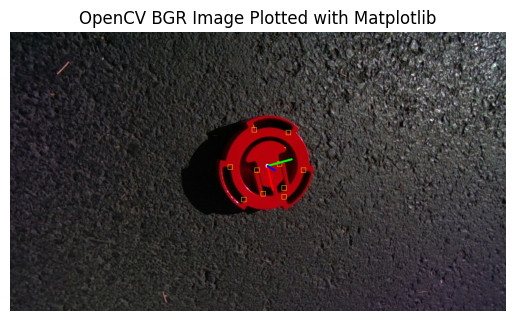

In [4]:
t0 = time.time()
img = cv2.imread(f"{img_dir}/color/{test_img}")
img_pill = Image.fromarray(img)
depth_img = np.load(f'{img_dir}/depth/{test_img[:-4]}.npy')
K = IntrinsicsMatrix()

bbox, score = bboxModel.find_bbox(img_pill)
kpts = kpModel.predict(img, bbox)
rotation, translation, img = kpModel.predict_position(K, depth_img, 12, img)
if translation is not None:
    H = TransformationMatrix(R=rotation, t=translation) 
    annotate_img(img, H, K)
else:
    print("Could not calculate position")

print("Elapsed time:", time.time() - t0)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using Matplotlib
plt.imshow(image_rgb)
plt.title('OpenCV BGR Image Plotted with Matplotlib')
plt.axis('off')  # Turn off axis labels
plt.show()